In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import datetime
import numpy as np
from PIL import Image
import os

### Functions

In [35]:
def get_frames(path,_from,_to,_all=False):
    """
    _from : borne inferieur en secondes
    _to : borne superieur en secondes
    _all : renvoie toutes les frames de la video
    """
    
    frames = []
    
    # lire la video et recuperer les stats
    video = cv.VideoCapture(path)
    frames_tot = int(video.get(cv.CAP_PROP_FRAME_COUNT))
    fps = video.get(cv.CAP_PROP_FPS)
    seconds = round(frames_tot / fps)

    # lever une exception si parametres invalides
    if _to > seconds:
        raise Exception("Nombre de seconds invalide")
        
    
    if _all:
        nb_frames = frames_tot
    else:
        video.set(cv.CAP_PROP_POS_MSEC, _from * 1000)
        nb_frames = int((_to - _from) * fps)
    
    for _ in range(nb_frames):
        _,frame = video.read()
        frames.append(frame)
        
    return np.array(frames)

def saving(frames,path_direc):
    """
    frames : liste de frames
    path_direc : le nom du repertoire 
    """
    
    if not os.path.exists(path_direc):
        os.mkdir(path_direc)
    
    for i_frame in range(frames.shape[0]):
        frame = Image.fromarray(frames[i_frame])
        name = "frame"+str(i_frame)+".png"
        image.save(path_direc+"/"+name)
        
def frame_partionned(frame,x,y,height,width):
    """
    frame : image à decouper
    x : position de depart
    y : position de depart
    height : longueur de decoupage
    width : largeur de decoupage
    """
    return frame[x:x+width , y:y+height]

def generate_train_test_sets(frames,coord_train,coord_test):
    """
    """
    x_tr,y_tr,hei_tr,wid_tr = coord_train
    x_te,y_te,hei_te,wid_te = coord_test    

### Tests

In [3]:
path = "VIDEOS/video_juste_nid-test.mp4"
video = cv.VideoCapture(path)
  

nb_frames = int(video.get(cv.CAP_PROP_FRAME_COUNT))
fps = video.get(cv.CAP_PROP_FPS)
  
seconds = round(nb_frames / fps)
video_time = datetime.timedelta(seconds=seconds)
print(f"nombre de frames : {nb_frames}")
print(f"durée en seconds : {seconds}")
print(f"temps de la video: {video_time}")
print()

# recuperer les frames entre 0s et 10s
frames = get_frames(path,0,10)
print(f"nombre de frames recuperées: {frames.shape[0]}")

# saving(frames,'./saving_frames')

nombre de frames : 14700
durée en seconds : 588
temps de la video: 0:09:48

nombre de frames recuperées: 250


In [36]:
frame = frames[100]
x = 100
y = 100
height = 600
width = 1500
frame_parti = frame_partionned(frame,x,y,height,width)

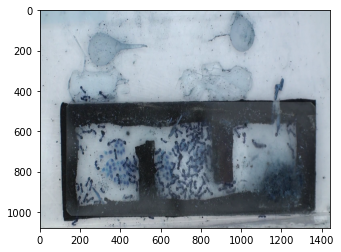

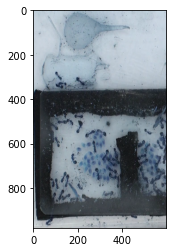

In [39]:
plt.imshow(frame)
plt.show()
plt.imshow(frame_parti)